# Maria Shemyakina
## Project Real estate

# Research on apartment sales ads

You’ll have the data from Yandex.Realty provided for you. Working with data will not always be completely familiar - from time to time, you'll encounter data from peculiar sources, operating with peculiar measurements. Let's work with something exotic to keep you on your toes: a real estate agency has an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to create an automated system that is capable of detecting anomalies and fraud.
There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. This could be calculated, for example, based upon the distance from the downtown area, airport, the nearest park or body of water.


# Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pymystem3 import Mystem
import pprint
from collections import Counter
import seaborn as sn

In [2]:
data = pd.read_csv('real_estate_data_eng.csv', sep='\t')

In [3]:
data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15773,5,4150000.0,36.80,2018-02-01T00:00:00,1,NaN,25.0,14.2,2,NaN,...,15.90,1.0,Pargolovo village,52768.0,17994.0,0.0,NaN,0.0,NaN,100.0
10822,1,29000000.0,192.00,2017-10-11T00:00:00,5,3.20,6.0,120.0,3,NaN,...,15.00,NaN,Saint Peterburg,26396.0,5243.0,1.0,329.0,0.0,NaN,153.0
6025,7,2650000.0,47.30,2017-12-01T00:00:00,3,2.50,5.0,34.2,5,NaN,...,5.00,1.0,Tosno,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2334,20,5350000.0,61.60,2015-11-04T00:00:00,3,2.50,9.0,41.5,1,NaN,...,8.20,NaN,Saint Peterburg,13836.0,14101.0,0.0,NaN,0.0,NaN,978.0
10852,7,3710000.0,35.46,2015-02-09T00:00:00,1,NaN,21.0,14.4,20,NaN,...,9.30,2.0,Saint Peterburg,17596.0,16392.0,0.0,NaN,2.0,521.0,1079.0
5244,14,16120000.0,110.00,2018-09-27T00:00:00,4,NaN,10.0,65.7,8,NaN,...,10.80,5.0,Saint Peterburg,37022.0,12543.0,1.0,248.0,1.0,739.0,NaN
17113,11,8900000.0,70.00,2018-02-21T00:00:00,2,2.80,16.0,34.0,13,False,...,14.00,2.0,Saint Peterburg,46411.0,15247.0,1.0,672.0,0.0,NaN,127.0
13577,17,3100000.0,32.10,2017-05-11T00:00:00,1,NaN,9.0,17.6,8,False,...,6.30,0.0,Saint Peterburg,36456.0,10813.0,0.0,NaN,0.0,NaN,76.0
19324,1,4700000.0,62.60,2017-08-18T00:00:00,3,NaN,9.0,43.0,4,NaN,...,7.00,0.0,Saint Peterburg,49666.0,16010.0,0.0,NaN,0.0,NaN,93.0
16235,5,4100000.0,37.00,2016-07-31T00:00:00,1,2.60,5.0,16.4,2,NaN,...,8.60,0.0,Pushkin,12697.0,24850.0,1.0,341.0,0.0,NaN,247.0


#  Step 2. Data preprocessing

In [4]:
data.describe(percentiles = [.025, .05, .25, .50, .75, .95, .975])

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
2.5%,0.000000,1.449945e+06,29.000000,1.000000,2.500000,3.000000,14.400000,1.000000,5.200000,0.000000,10458.600000,2357.000000,0.000000,51.000000,0.000000,62.000000,6.000000
5%,1.000000,1.870000e+06,31.000000,1.000000,2.500000,4.000000,15.200000,1.000000,5.500000,0.000000,11557.400000,3541.000000,0.000000,95.900000,0.000000,93.000000,9.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
95%,20.000000,1.530000e+07,116.000000,4.000000,3.300000,25.000000,69.000000,16.000000,20.000000,2.000000,51340.000000,31671.600000,2.000000,968.000000,3.000000,976.550000,647.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.shape

(23699, 22)

In [7]:

data.duplicated().sum()

0

In [8]:

data.isnull().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

### last_price

In [9]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

The data themselves do not raise any questions for me yet, so I just use them to calculate the square meter of housing. To do this, divide the cost by the total number of meters

In [10]:
data['m2'] = data['last_price']/data['total_area']


In [11]:
data['m2'] = data[['m2']].astype(int)

In [12]:
data['m2'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: m2, dtype: int64

### Total_area <a class="anchor" id="6"></a>

In [13]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

We see that the minimum area of apartments is 12 meters, and the maximum is 900, which is hypothetically quite real. There are no passes. So I won't touch this data yet

### First_day_exposition <a class="anchor" id="7"></a>

In [14]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-11-16T00:00:00      1
2015-01-12T00:00:00      1
2015-04-04T00:00:00      1
2015-07-27T00:00:00      1
2015-07-28T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

Time and date in an inconvenient format, we need to reformat it to the datetime type

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = "%Y-%m-%dT%H:%M:%S")

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

We have made the time format easy to read and see that the data type has changed to datetime. 
 
 ### Now we need to add the day of the week, month, and year of ad publication to the table <a class= "anchor" id= "8"></a>
 
 I use the .dt notation for this

In [18]:
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [19]:

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


Columns are created, but it is inconvenient to use numbers of days and months. You can try replacing them with the names of days of the week and months.

In [20]:
data['month_exposition'] = data['month_exposition'].map({
    1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 
    9:'sept', 10:'oct', 11:'nov', 12:'dec'
})

data['week_day_exposition'] = data['week_day_exposition'].map({0:'mon', 1:'tue', 
                            2:'wed', 3:'thur', 4:'fri', 5:'sat', 6:'sun'})



In [21]:

data['year_exposition'] = data['year_exposition'].astype('int16')

In [22]:

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,thur,march,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,tue,dec,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,thur,aug,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,fri,july,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,tue,june,2018


### Apartments, studios, free layout <a class="anchor" id="14"></a>

In [23]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


The values are correct and have a Boolean type. However, there are a lot of omissions in the data and there are very few apartments with the True parameter - 50 units

In [24]:
print(data['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


The values are correct and have a Boolean type. Number of True only 149

In [25]:
print(data['open_plan'].value_counts())

False    23632
True        67
Name: open_plan, dtype: int64


The values are correct and have a Boolean type. You can look at the data on studios and apartments and try to combine it in one column "apartment layout"

In [26]:
def type_plan(row):
    if row['is_apartment'] == True:
        return "apartment"
    elif row['studio'] == True:
        return "studio"
    elif row['open_plan'] == True:
        return "open plan"
    else:
        return "another"

In [27]:
data['type_plan'] = data.apply(type_plan, axis=1)

In [28]:
data['type_plan'].value_counts()

another      23433
studio         149
open plan       67
apartment       50
Name: type_plan, dtype: int64

### Rooms <a class="anchor" id="9"></a>

In [29]:
print(data['rooms'].describe())

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [30]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


We see that the largest number of apartments with 1, 2 and 3 rooms.This does not raise any questions, because indeed most houses are built with this number of rooms. Questions are raised by apartments with 0 rooms - this is most likely an error, as well as with an unusually large number of rooms (19)

In [31]:
rooms_counts = data[data['rooms'] > 8].shape[0]
print("rooms: {}\t Percentage of multi-rooms apartments: {:.1%}"
      .format(rooms_counts, rooms_counts/data.shape[0]))

rooms: 19	 Percentage of multi-rooms apartments: 0.1%


The percentage of such apartments is not very large, they do not affect the analysis, I believe that you can leave them. The question is raised by apartments with zero room values. Whether this parameter is an error or this designation was used for Studio apartments, where there are no rooms in fact. You can check this by categorizing our apartments

In [32]:
rooms_counts = data[data['rooms'] <= 0].shape[0]
print("rooms: {}\t Percentage of zero room apartments: {:.1%}"
      .format(rooms_counts, rooms_counts/data.shape[0]))

rooms: 197	 Percentage of zero room apartments: 0.8%


There are not many such apartments, but let's see if they are related to the layout?

In [33]:
data[data['rooms'] == 0]['type_plan'].value_counts()

studio       138
open plan     59
Name: type_plan, dtype: int64

The guess was confirmed! All apartments with zero rooms are either studios or open-plan. Since any type of layout still has at least one room, replace 0 with 1

In [34]:
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)

In [35]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

Great! The replacement was successful!

###  Ceiling_height <a class="anchor" id="10"></a>

In [36]:
print(data['ceiling_height'].value_counts())

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64


In [37]:
print(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


This data contains a lot of information that looks implausible. Ceilings higher than 3.8 meters and lower than 2.3 meters are most likely mistaken.  Let's see how many of these apartments and if not very many, they can be removed. We will also get rid of omissions by replacing them with a median and grouping them by a series of houses

In [38]:
data['ceiling_height'].isnull().sum()

9195

In [39]:

ceiling_height_counts = data[data['ceiling_height'] < 2.3].shape[0]
print("ceiling_height: {}\t Percentage of low ceilings: {:.1%}"
      .format(ceiling_height_counts, ceiling_height_counts/data.shape[0]))

ceiling_height: 16	 Percentage of low ceilings: 0.1%


In [40]:
ceiling_height_counts = data[data['ceiling_height'] > 3.8].shape[0]
print("ceiling_height: {}\t Percentage of high ceilings: {:.1%}"
      .format(ceiling_height_counts, ceiling_height_counts/data.shape[0]))

ceiling_height: 147	 Percentage of high ceilings: 0.6%


The percentage in both categories is very low, so we can remove this data

In [41]:
print(data.shape)
data = data.drop(data[data['ceiling_height'] < 2.3].index, axis=0)
print(data.shape)

(23699, 27)
(23683, 27)


In [42]:
print(data.shape)
data = data.drop(data[data['ceiling_height'] > 3.8].index, axis=0)
print(data.shape)

(23683, 27)
(23536, 27)


In [43]:
ceiling_height_median = data['ceiling_height'].median()
print("ceiling_height_median: {:.2f}".format(ceiling_height_median))

ceiling_height_median: 2.65


In [44]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)


In [45]:
data['ceiling_height'].isnull().sum()

0

###  Floors_total <a class="anchor" id="11"></a>

In [46]:
data['floors_total'].describe()

count    23450.000000
mean        10.702644
std          6.596494
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In our data, the minimum and maximum number of floors looks quite real, but you will need to work with the omissions)

In [47]:
data['floors_total'].isnull().sum()

86

Replace the missing values with median and check whether the replacement was successful

In [48]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [49]:
data['floors_total'].isnull().sum()

0

### Living_area <a class="anchor" id="12"></a>

In [50]:
data['living_area'].value_counts()

18.00    879
17.00    672
30.00    593
16.00    486
20.00    479
        ... 
27.88      1
42.17      1
92.10      1
86.10      1
15.55      1
Name: living_area, Length: 1761, dtype: int64

In [51]:
data['living_area'].describe()

count    21643.000000
mean        34.192438
std         21.177136
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Data on living space raises a question. The minimum value of 2 meters looks improbable. The lower quartile of 5% (in the first discraib at the very beginning) shows an area of 15 meters. Take the threshold value for example 10 meters

In [52]:
living_area_counts = data[data['living_area'] < 10].shape[0]
print("living_area: {}\t small living_area_counts: {:.1%}"
      .format(living_area_counts, living_area_counts/data.shape[0]))

living_area: 25	 small living_area_counts: 0.1%


The percentage is very low, so we can remove this data

In [53]:
print(data.shape)
data = data.drop(data[data['living_area'] < 10].index, axis=0)
print(data.shape)

(23536, 27)
(23511, 27)


In [54]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [55]:
data['living_area'].isnull().sum()

0

Calculate the ratio of living space to total

In [56]:
data['living_area_relation'] = data['living_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,120370,thur,march,2019,another,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82920,tue,dec,2018,another,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92785,thur,aug,2015,another,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,84.0,3.0,234.0,424.0,408176,fri,july,2015,another,0.188679
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000,tue,june,2018,another,0.320000


### floor <a class="anchor" id="13"></a>

In [57]:
print(data['floor'].describe())

count    23511.000000
mean         5.901578
std          4.889238
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


We need to categorize the floor where the apartment is located. To do this, we will create a function that will determine the first, last, or unknown floor

In [58]:
def floor_category(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'another'

In [59]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [60]:
data[['floor', 'floor_category']].sample(20)

,floor,floor_category
7907,16,another
12377,5,last
12667,16,another
4427,7,another
265,14,another
18118,1,first
1665,7,another
21253,15,another
11547,1,first
16629,5,last


### kitchen_area <a class="anchor" id="15"></a>

In [61]:
data['kitchen_area'].describe()

count    21254.000000
mean        10.524327
std          5.801294
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [62]:
data['kitchen_area'].isnull().sum()

2257

A lot of missing values. I will replace them with the median value, grouping them by a rooms

In [63]:
data['kitchen_area']= data.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.median()))

In [64]:

data['kitchen_area'].isnull().sum()

0

The minimum area is 1 meter, which does not seem to be true, as well as the kitchen area of 112 meters. 5% of the quantile includes kitchens with an area of 5 meters. Look at the percentage of our kitchens that are less than 4 meters or more than 50

In [65]:
kitchen_area_count = data[data['kitchen_area'] < 4].shape[0]
print("kitchen_area: {}\t Percentage: {:.1%}"
      .format(kitchen_area_count, kitchen_area_count/data.shape[0]))

kitchen_area: 29	 Percentage: 0.1%


In [66]:
kitchen_area_count = data[data['kitchen_area'] > 50].shape[0]
print("kitchen_area: {}\t Percentage: {:.1%}"
      .format(kitchen_area_count, kitchen_area_count/data.shape[0]))

kitchen_area: 41	 Percentage: 0.2%


There are really very few such kitchens. We can get rid of them

In [67]:
print(data.shape)
data = data.drop(data[data['kitchen_area'] < 4].index, axis=0)
print(data.shape)

(23511, 29)
(23482, 29)


In [68]:
print(data.shape)
data = data.drop(data[data['kitchen_area'] > 50].index, axis=0)
print(data.shape)

(23482, 29)
(23441, 29)


Now we need to calculate and add a column to the table: the ratio of kitchen area to total area

In [69]:
data['kitchen_total_area_relation'] = data['kitchen_area']/data['total_area']

In [70]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation,floor_category,kitchen_total_area_relation
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,120370,thur,march,2019,another,0.472222,another,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,81.0,82920,tue,dec,2018,another,0.460396,first,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,92785,thur,aug,2015,another,0.612500,another,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,234.0,424.0,408176,fri,july,2015,another,0.188679,another,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000,tue,june,2018,another,0.320000,another,0.410000


In [71]:
data.isnull().sum().sort_values(ascending = False)


is_apartment                   20708
parks_nearest                  15497
ponds_nearest                  14472
balcony                        11374
airports_nearest                5501
cityCenters_nearest             5481
ponds_around3000                5480
parks_around3000                5480
days_exposition                 3134
locality_name                     48
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
studio                             0
last_price                         0
living_area                        0
floor                              0
kitchen_total_area_relation        0
open_plan                          0
kitchen_area                       0
floor_category                     0
m2                                 0
week_day_exposition                0
month_exposition                   0
year_exposition                    0
t

We need to resolve the issue with the data type

In [72]:
# Converting to integer type the part of data in which floating-point data is redundant
data['total_area'] = data['total_area'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['total_images'] = data['total_images'].astype('int8')
data['rooms'] = data['rooms'].astype('int8')
data['floor'] = data['floor'].astype('int8')


### Balcony <a class="anchor" id="16"></a>

In [73]:
data['balcony'].value_counts()

1.0    4153
0.0    3722
2.0    3631
5.0     301
4.0     179
3.0      81
Name: balcony, dtype: int64

In [74]:
data['balcony'].isnull().sum()

11374

We see that actually half of the values are skipped. We must try to understand what to replace these omissions and whether to replace them at all. 

So far, I haven't found any relationships between balcony and other parameters. So for now, I will leave this data as it is.

In [75]:
data.pivot_table(index = 'type_plan', columns='balcony', values='floor', aggfunc='count')


balcony,0.0,1.0,2.0,3.0,4.0,5.0
type_plan,,,,,,
another,3704.0,4111.0,3527.0,81.0,178.0,298.0
apartment,NaN,9.0,13.0,NaN,1.0,3.0
open plan,7.0,15.0,31.0,NaN,NaN,NaN
studio,11.0,18.0,60.0,NaN,NaN,NaN


In [76]:
data.pivot_table(index='rooms', columns='balcony', values='floor', aggfunc='count')


balcony,0.0,1.0,2.0,3.0,4.0,5.0
rooms,,,,,,
1,1234.0,1490.0,1559.0,2.0,16.0,24.0
2,1263.0,1540.0,1135.0,21.0,60.0,82.0
3,912.0,904.0,828.0,41.0,80.0,165.0
4,223.0,152.0,90.0,12.0,18.0,23.0
5,58.0,41.0,15.0,4.0,5.0,5.0
6,15.0,14.0,3.0,NaN,NaN,NaN
7,11.0,8.0,1.0,1.0,NaN,2.0
8,3.0,NaN,NaN,NaN,NaN,NaN
9,1.0,1.0,NaN,NaN,NaN,NaN


### locality_name <a class="anchor" id="17"></a>

In [77]:
data['locality_name'].value_counts()

Saint Peterburg             15517
Murino village                551
Shushary village              437
Vsevolozhsk                   395
Pushkin                       362
                            ...  
Russko village                  1
Stare Khinkolovo village        1
Yalgino village                 1
Bolshoy Reyzino village         1
Borisova Griva village          1
Name: locality_name, Length: 340, dtype: int64

In [78]:
data['locality_name'].isnull().sum()

48

In [79]:
# I decided to replace the omissions with a new clear category

data['locality_name'] = data['locality_name'].fillna('The location is unknown')

In [80]:
data['locality_name'].isnull().sum()

0

Let's lemmatize our data to make it easier to divide it into categories. Since Saint Peterburg is a large city, we will leave it, and divide the rest into groups

In [81]:
locality_name_unique = data['locality_name'].unique()

In [82]:
locality_name_unique

array(['Saint Peterburg', 'Shushary village', 'Yanino village',
       'Pargolovo village', 'Murino village', 'Lomonosov', 'Sertolovo',
       'Petergof', 'Pushkin', 'Kudrovo village ', 'Kommunar', 'Kolpino',
       'village Krasny Bor', 'Gatchina', 'village Fodorovskoye', 'Vyborg',
       'Kronshtadt', 'Kirovsk', 'Novoye Devyatkino village',
       'Metallostroy village', 'Lebyazhye village', 'Siversky village',
       'Molodtsovo village', 'Kuzmolovsky village',
       'Novaya Ropsha village', 'Pablovsk', 'Pikkolovo village',
       'Vsevolozhsk', 'Volkhov', 'Kingisepp', 'Priozersk', 'Sestroretsk',
       'Kuttuzi village', 'Annino village', 'Yefimovsky village',
       'Plodovoye village', "Zaklin'ye village", 'Torkovichi village ',
       'Pervomayskoye village', 'Krasnoye Selo', 'Pontonny village',
       'Syasstroy', 'Staraya village ', 'Leskolovo village',
       'Novyi Svit village', 'Slantsy', 'Putilovo village', 'Ivangorod',
       'Murino', 'Shlisselburg', 'Nikolskoye', 'Zel

In [83]:
m = Mystem()
string = ' ; '.join(locality_name_unique)
pprint.pprint(string)

lemmas = m.lemmatize(string)

('Saint Peterburg ; Shushary village ; Yanino village ; Pargolovo village ; '
 'Murino village ; Lomonosov ; Sertolovo ; Petergof ; Pushkin ; Kudrovo '
 'village  ; Kommunar ; Kolpino ; village Krasny Bor ; Gatchina ; village '
 'Fodorovskoye ; Vyborg ; Kronshtadt ; Kirovsk ; Novoye Devyatkino village ; '
 'Metallostroy village ; Lebyazhye village ; Siversky village ; Molodtsovo '
 'village ; Kuzmolovsky village ; Novaya Ropsha village ; Pablovsk ; Pikkolovo '
 'village ; Vsevolozhsk ; Volkhov ; Kingisepp ; Priozersk ; Sestroretsk ; '
 'Kuttuzi village ; Annino village ; Yefimovsky village ; Plodovoye village ; '
 "Zaklin'ye village ; Torkovichi village  ; Pervomayskoye village ; Krasnoye "
 'Selo ; Pontonny village ; Syasstroy ; Staraya village  ; Leskolovo village ; '
 'Novyi Svit village ; Slantsy ; Putilovo village ; Ivangorod ; Murino ; '
 'Shlisselburg ; Nikolskoye ; Zelenogorsk ; Sosnovy Bor ; New Svit village ; '
 "Orzhitsy village ; Kal'tino village ; Kudrovo ; Romanovka villa

In [84]:
data['locality_name_type'] = data.locality_name.apply(
            lambda x: 'Saint Peterburg'if 'Saint Peterburg' in str(x) 
            else 'village' if 'village' in str(x) 
            else 'the location is unknown' if 'The location is unknown' in str(x)
            else 'city')

In [85]:
data['locality_name_type'].value_counts()

Saint Peterburg            15517
city                        4261
village                     3615
the location is unknown       48
Name: locality_name_type, dtype: int64

We filled in the gaps, lemmatized the data, and aggregated it by location

### The distance to the airport Distance to center, Distance to Park, distance to the pond  <a class="anchor" id="18"></a>

I don't see any point in processing omissions in this data, since deleting omissions will distort the overall picture, and the median won't give reliable values, so I'll leave it as it is. Plus, these parameters are insignificant in further analysis

In [86]:
data['airports_nearest'].isnull().sum()

5501

In [87]:
data['cityCenters_nearest'].isnull().sum()

5481

In [88]:
data['parks_nearest'].isnull().sum()

15497

In [89]:
data['ponds_nearest'].isnull().sum()

14472

### Number of parks and reservoirs within a 3 km radius  <a class="anchor" id="19"></a>

Let's look at our data and the omissions in it. We have quantitative data, which means you can group it by location by replacing it with mode, and replace the rest with 0

In [90]:
data['parks_around3000'].isnull().sum()


5480

In [91]:
data['ponds_around3000'].isnull().sum()


5480

In [92]:
data['parks_around3000'] = data.groupby('locality_name')['parks_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [93]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)


In [94]:
data['parks_around3000'].isna().sum()


0

In [95]:
data['ponds_around3000'] = data.groupby('locality_name')['ponds_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [96]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


In [97]:
data['ponds_around3000'].isna().sum()


0

In [98]:
data['parks_around3000'] = data['parks_around3000'].astype('int16')
data['ponds_around3000'] = data['ponds_around3000'].astype('int16')


In [99]:
data['parks_around3000'].value_counts()

0    15501
1     5605
2     1706
3      629
Name: parks_around3000, dtype: int64

In [100]:
data['ponds_around3000'].value_counts()

0    14472
1     5648
2     1865
3     1456
Name: ponds_around3000, dtype: int64

This column is not included in the project description. Judging by the name, this is a square, but the square of what? There are no omissions, so I will not touch this data.

In [101]:
data['total_area'].describe()

count    23441.000000
mean        59.464187
std         32.810387
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        517.000000
Name: total_area, dtype: float64

In [102]:
data['total_area'].isnull().sum()

0

# Summary: <a class= "anchor" id= "20"></a>
   * A preliminary analysis of all data was carried out, problem areas and omissions were identified
   
   * Columns with abnormal values were found (too high and low ceilings, scanty and huge area of the apartment and kitchen), as well as data in which the number of missing values was more than 50%
   
   * The missing values in the key columns were filled in using the median value, filling in at 0, and deleting data that was out of the picture and whose percentage was no more than 1% of the data (for example, ceiling height and kitchen floor height) using dropna.
   
   * Some of the data, such as the ad placement date, distance, cost, number of rooms, floor, etc. were converted to more convenient formats ( int, datetime, obj).
   
   * New information was calculated and added to our dataframe, such as the price per square meter, the ratio of residential and total area, the ratio of kitchen area to total, the year, month and day of the week of publication, and categorized the floor on which the apartment is located (first, last, other)
   
   
### The reason for incorrect or missing data may be different. Most likely, the reason was that the data was entered by the users themselves and apparently without strict input restrictions in the system (i.e. the person did not choose the apartment parameters from the offered options, but entered them manually himself). Manual input always carries the risk of errors, plus many of the data may simply be unknown to the user.

# Part 3.  Make some researches


## What are the typical parameters of apartments for sale (for example, size, price)? Specify the most important characteristics and build graphs.  <a class="anchor" id="22"></a>

Typical parameters of an apartment can be considered: area, total cost, cost per square meter, number of rooms, floor, ceiling height and kitchen area. Calculate the median for a typical apartment

In [103]:
data.median()

total_images                   9.000000e+00
last_price                     4.600000e+06
total_area                     5.200000e+01
rooms                          2.000000e+00
ceiling_height                 2.650000e+00
floors_total                   9.000000e+00
living_area                    3.000000e+01
floor                          4.000000e+00
is_apartment                   0.000000e+00
studio                         0.000000e+00
open_plan                      0.000000e+00
kitchen_area                   9.000000e+00
balcony                        1.000000e+00
airports_nearest               2.678600e+04
cityCenters_nearest            1.314400e+04
parks_around3000               0.000000e+00
parks_nearest                  4.550000e+02
ponds_around3000               0.000000e+00
ponds_nearest                  5.020000e+02
days_exposition                9.500000e+01
m2                             9.481000e+04
year_exposition                2.017000e+03
living_area_relation           5

In [104]:
for i in ['last_price', 'total_area', 'm2', 'kitchen_area', 'ceiling_height','rooms', 'floor']:
    print("typical {}: {:.2f}".format(i, data[i].median()))

typical last_price: 4600000.00
typical total_area: 52.00
typical m2: 94810.00
typical kitchen_area: 9.00
typical ceiling_height: 2.65
typical rooms: 2.00
typical floor: 4.00


We see that our standard apartment has the following parameters:
    * price 4.6 million
    * total area of 52 sq. m.
    * price of sq. m. 94 810 R
    * kitchen area 9 sq. m.
    * ceiling height 2.65 m
    * 2 rooms
    * 4th floor

Let's look at the presence of anomalies for our key parameters. Do this with the help of graphs.

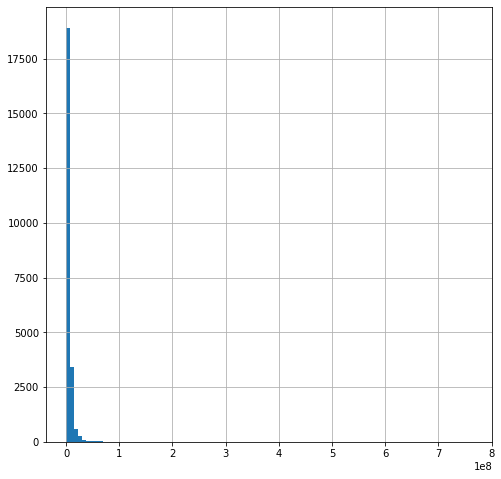

In [105]:
data['last_price'].hist(bins = 100, figsize = (8,8), grid = True) 

We see an abnormal spike that spoils the whole picture. I'll try to set a range and see what happens

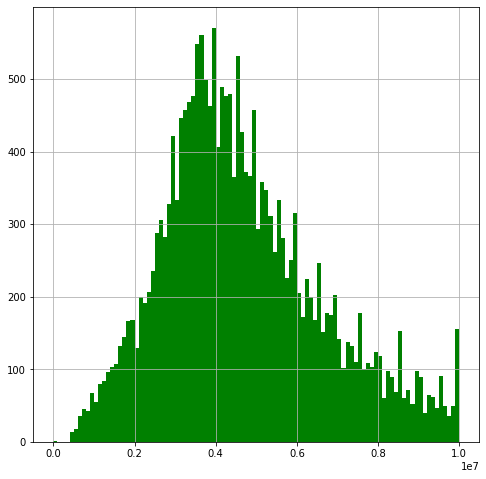

In [106]:
data['last_price'].hist(bins = 100, figsize = (8,8), grid = True, range=(0, 10000000), color = 'green') 

With this range, the distribution looks normal, with a single peak. So there are no anomalies other than the fantastic super price. Let's also look at the other key parameters

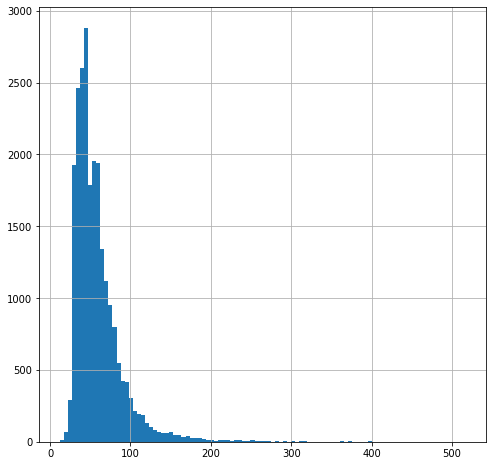

In [107]:
data['total_area'].hist(bins = 100, figsize = (8,8), grid = True) 

The anomalous peak is visible again. Let's set the range and see what happens

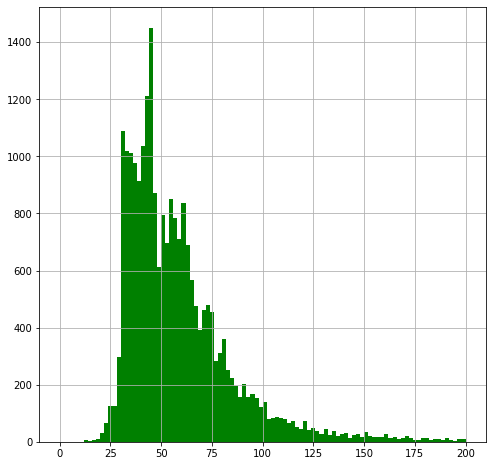

In [108]:
data['total_area'].hist(bins = 100, figsize = (8,8), grid = True, range = (0, 200), color = 'green') 

It looks like a Poisson distribution, but with a "tail". The maximum concentration of apartments is just an area of about 50 meters

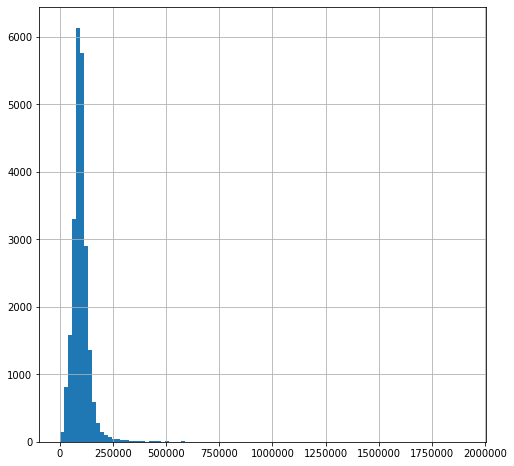

In [109]:
data['m2'].hist(bins = 100, figsize = (8,8), grid = True) 

The graph type is similar to a normal distribution. Let's look in the range

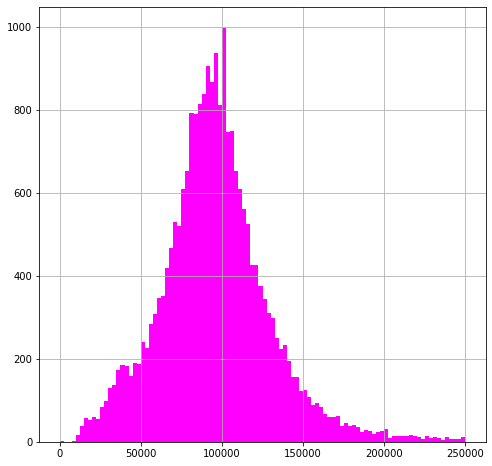

In [110]:
data['m2'].hist(bins = 100, figsize = (8,8), grid = True, range = (0, 250000), color = 'magenta') 

Beauty! The Poisson distribution looks great) The most likely value is about 100,000 rubles ( we have 94,810)

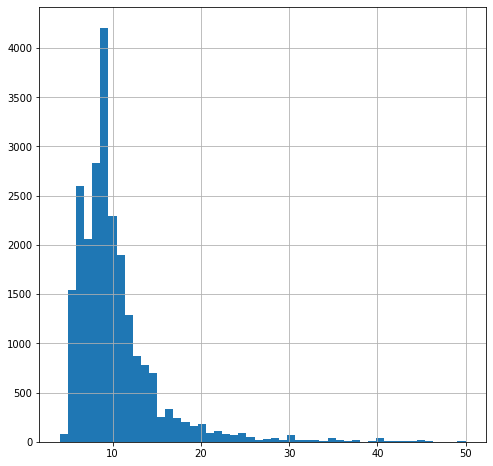

In [111]:
data['kitchen_area'].hist(bins = 50, figsize = (8,8), grid = True) 

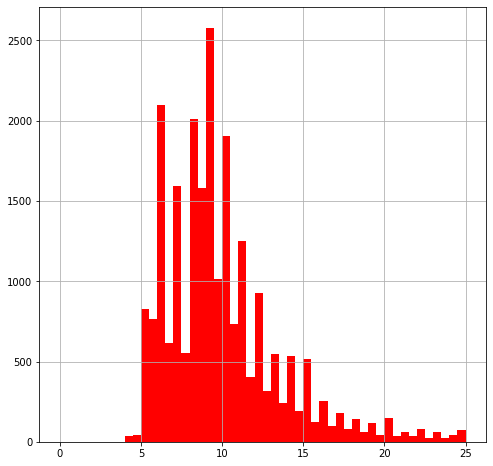

In [112]:
data['kitchen_area'].hist(bins = 50, figsize = (8,8), grid = True, range = (0,25), color = 'red') 

The graph is again similar to the truth, the most likely value is about 10 square meters ( we have 9.3)

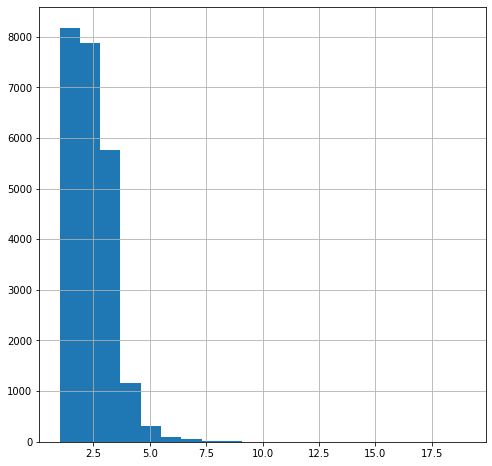

In [113]:
data['rooms'].hist(bins = 20, figsize = (8,8), grid = True) 

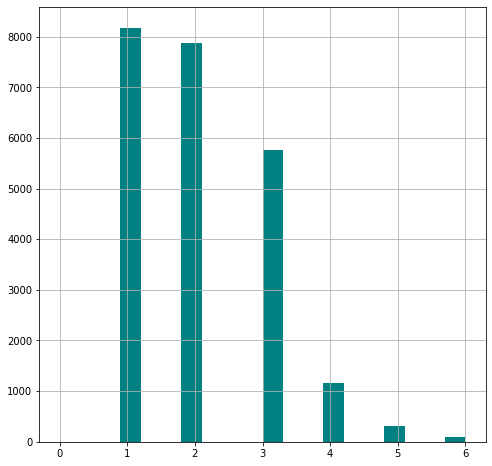

In [114]:
data['rooms'].hist(bins = 20, figsize = (8,8), grid = True, range = (0,6), color = 'teal') 

The graph clearly shows that the main mass of apartments is 1,2 and 3 rooms, which corresponds to reality and our data

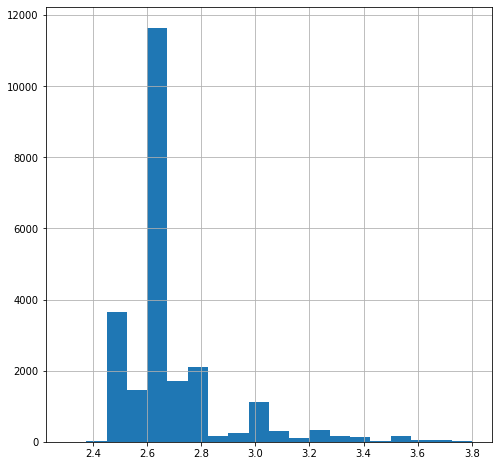

In [115]:
data['ceiling_height'].hist(bins = 20, figsize = (8,8), grid = True) 

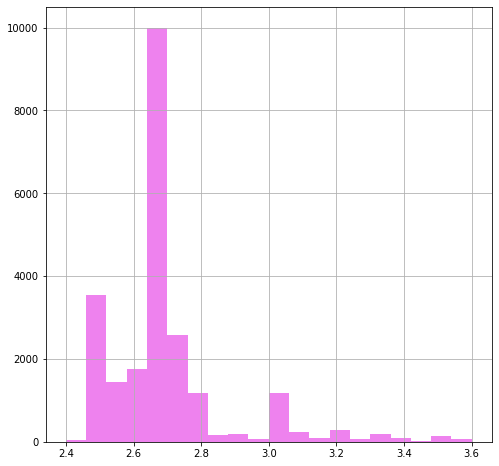

In [116]:
data['ceiling_height'].hist(bins = 20, figsize = (8,8), grid = True, range = (2.4,3.6), color = 'violet') 

This distribution shows that the main ceiling height is approximately 2.7 meters, which is the same as our data (2.65)

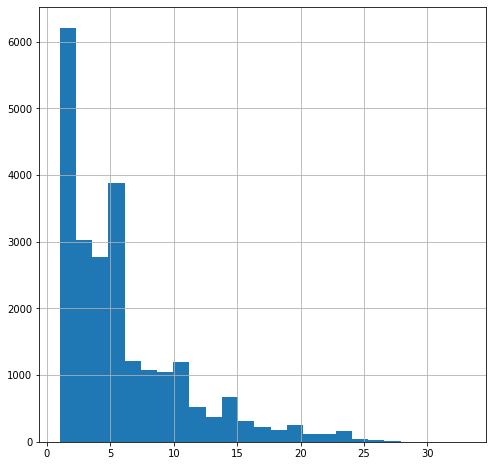

In [117]:
data['floor'].hist(bins = 25, figsize = (8,8), grid = True) 

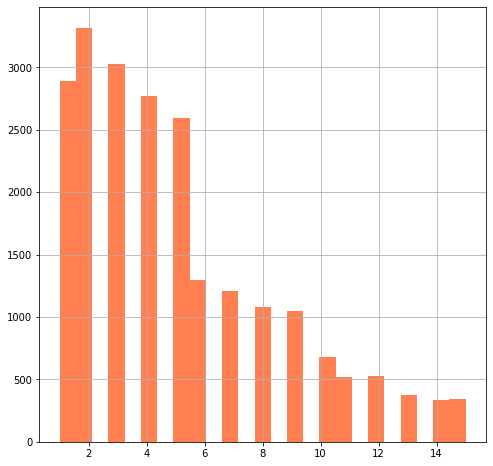

In [118]:
data['floor'].hist(bins = 25, figsize = (8,8), grid = True, range = (1, 15), color = 'coral') 

The maximum concentration of apartments from 1 to 5 floors, which is probably due to the large number of khrushchevok in the country.

Let's look at another important point, such as the number of days that the ad is hanging

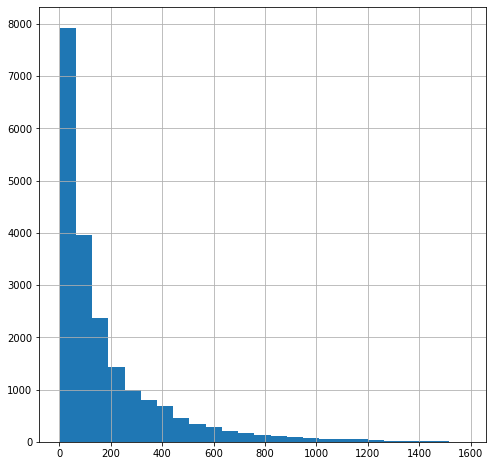

In [119]:
data['days_exposition'].hist(bins = 25, figsize = (8,8), grid = True) 

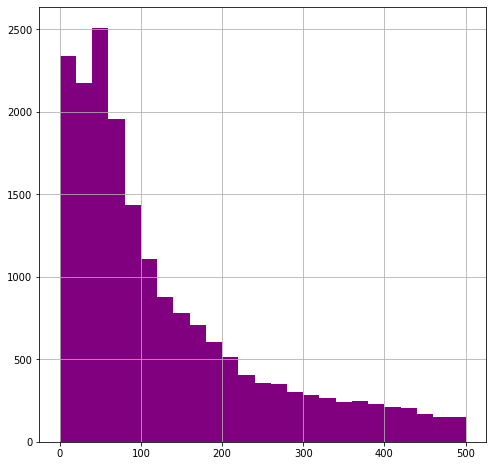

In [120]:
data['days_exposition'].hist(bins = 25, figsize = (8,8), grid = True, range = (0,500), color = 'purple') 

This graph shows that most apartments are sold in the first 70 to 100 days after the ad is placed

### Remove apartments with a very high price and other unusual parameters. Describe what features you found.

To detect and remove abnormal values we use the interquartile span method

In [121]:
last_price_quant25 = data['last_price'].quantile(0.25)
last_price_quant75 = data['last_price'].quantile(0.75)

In [122]:
last_price_quant25


3400000.0

In [123]:
last_price_quant75

6700000.0

In [124]:
interquartile_range = last_price_quant75 - last_price_quant25

# calculate the upper bound of the data
upper_threshold = last_price_quant75 + 1.5*interquartile_range


# removing apartments with abnormal prices
good_place = data[data['last_price'] < upper_threshold]


In [125]:
print("Apartments with a good price: {}".format(good_place.shape[0]))

Apartments with a good price: 21433


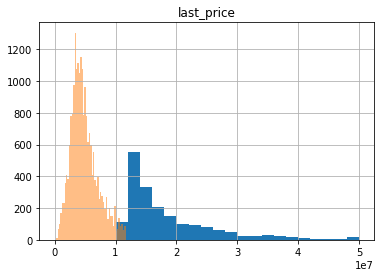

In [126]:
data[data['last_price'] >= upper_threshold].hist('last_price', bins=25, range=(0, 5e7) )
# compare with the distribution of apartments
good_place['last_price'].hist(bins=50, alpha=0.5)


Let's look at the total area of the apartment

In [127]:
total_area25 = data['total_area'].quantile(0.25)
total_area75 = data['total_area'].quantile(0.75)

In [128]:
total_area25


40.0

In [129]:
total_area75

69.0

In [130]:
interquartile_range_area = total_area75 - total_area25

# calculate the upper bound of the data
upper_threshold = total_area75 + 1.5*interquartile_range_area


# removing apartments with abnormal area
good_place = data[data['total_area'] < upper_threshold]


In [131]:
print ("Apartments with a total_area: {}".format(good_place.shape[0]))

Apartments with a total_area: 22222


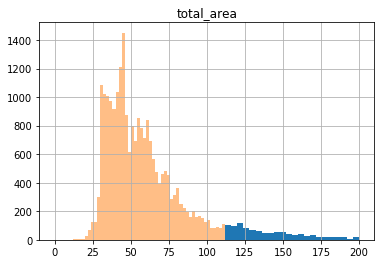

In [132]:
data[data['total_area'] >= upper_threshold].hist('total_area', bins=50, range=(0, 200), )

# compare with the distribution of apartments
good_place['total_area'].hist(bins=50, alpha=0.5)


look at the kitchen area

In [133]:
kitchen_area25 = data['kitchen_area'].quantile(0.25)
kitchen_area75 = data['kitchen_area'].quantile(0.75)

In [134]:
kitchen_area25


7.3

In [135]:
kitchen_area75

11.4

In [136]:
interquartile_range_kitchen = kitchen_area75 - kitchen_area25


upper_threshold = kitchen_area75 + 1.5*interquartile_range_kitchen



good_place = data[data['kitchen_area'] < upper_threshold]


In [137]:
print(" Apartments with good kitchen_area: {}".format(good_place.shape[0]))

 Apartments with good kitchen_area: 21938


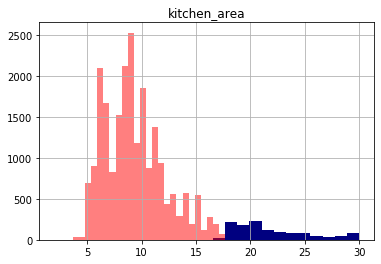

In [138]:
data[data['kitchen_area'] >= upper_threshold].hist('kitchen_area', bins=25, range=(2, 30), color = 'navy')

good_place['kitchen_area'].hist(bins=50, alpha = 0.5, range=(2, 30), color = 'red')



Look at the rooms and floor

In [139]:
data['rooms'].describe(percentiles = [.05, .25, .50, .75, .95])

count    23441.000000
mean         2.070347
std          1.049967
min          1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          4.000000
max         19.000000
Name: rooms, dtype: float64

In [140]:
data['floor'].describe(percentiles = [.05, .25, .50, .75, .95])

count    23441.000000
mean         5.901241
std          4.887839
min          1.000000
5%           1.000000
25%          2.000000
50%          4.000000
75%          8.000000
95%         16.000000
max         33.000000
Name: floor, dtype: float64

I processed and deleted the anomalous ceiling height data at the pre-processing stage, but for rooms and floors I think that there is no need to delete the anomalies, because there are very few of them (we can see this from 95% of the quartile and the maximum values are not very far from reality.)

### Subtotal 1 <a class= "anchor" id= "23"></a>
We formed an image of a typical apartment, then analyzed and looked at all the key characteristics on the charts. We detected abnormal emissions and got rid of them. We saw that the data for rooms and floor has a discrete distribution (the number of rooms and floor can't be 1.25 for example).These prices, total area, ceiling height and kitchen area have a Poisson distribution. And the number of days of ad placement has a clear spike in the first 100 days and a long heavy tail on the right, which suggests that some apartments are sold very much in debt.

## What factors most affect the cost of an apartment? Study separately whether the price per square meter depends on the number of rooms, floor (first or last), distance from the center, and the date of placement: day of the week, month, and year. <a class="anchor" id="24"></a>

Let's see how the price depends on the floor. To do this, group the median value per square meter and the floor category

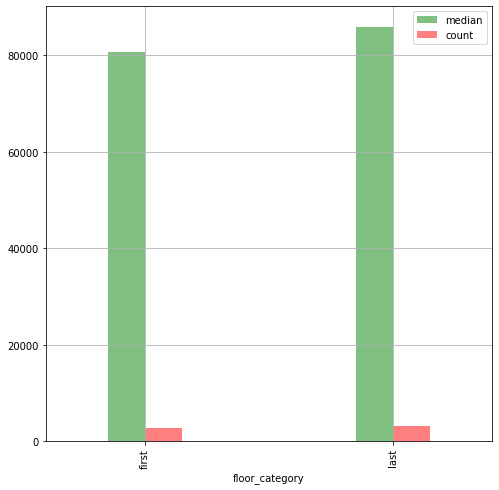

In [141]:
good_place.query('floor_category != "another"')\
    .groupby('floor_category')['m2']\
    .agg(['median', 'count']).plot(kind='bar', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width=0.3, grid=True)

There is almost no difference in the price per square meter depending on the floor. Apartments on the first floor are just a little cheaper than the last floor.

Let's look at the dependence on the number of rooms.

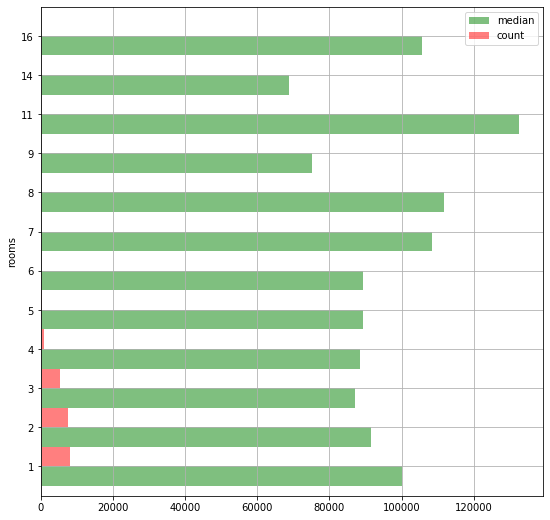

In [142]:
good_place.groupby('rooms')['m2']\
    .agg(['median', 'count']).plot(kind='barh', figsize=(9, 9),
                          color=['green', 'red'], alpha=0.5, width=1, grid=True)

 The graph shows that the more rooms there are, the lower the average price. This is especially evident in the most popular 1,23 room apartments

Now let's check the relationship between the price per square meter and the publication date

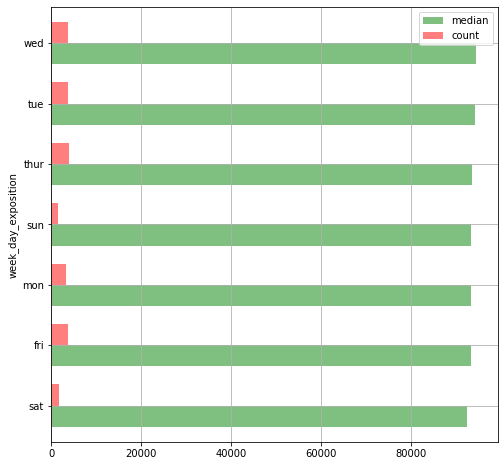

In [143]:
good_place\
    .groupby('week_day_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

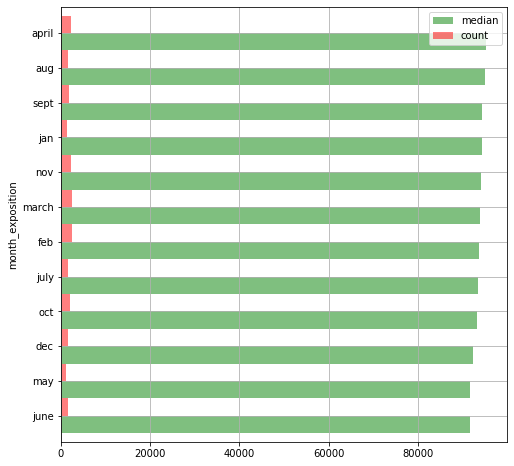

In [144]:
good_place\
    .groupby('month_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 1, grid=True)

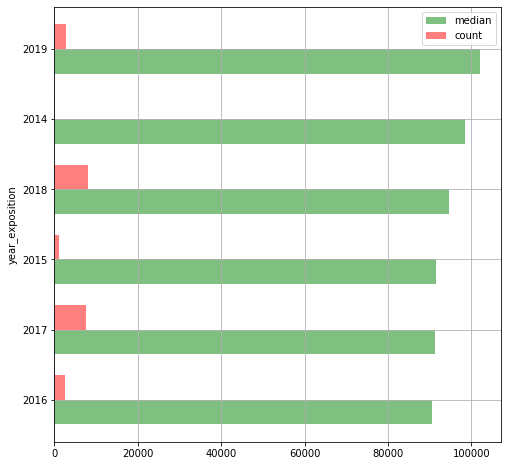

In [145]:
good_place\
    .groupby('year_exposition')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

The chart shows that the day of the week and month of publication and the cost of a square meter of housing are not related, which is not surprising. But the annual cross-section shows that apartments used to be cheaper than they are now)

Let's look at the ratio of price square meter and location

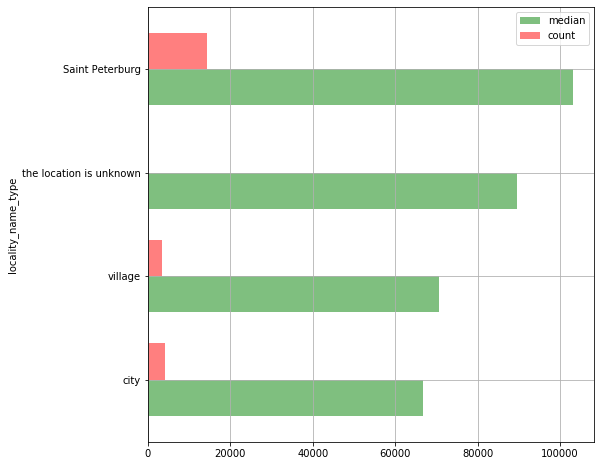

In [146]:
good_place\
    .groupby('locality_name_type')['m2']\
    .agg(['median', 'count']).sort_values(by='median', ascending=True)\
        .plot(kind='barh', figsize=(8, 8),
                          color=['green', 'red'], alpha=0.5, width= 0.7, grid=True)

We see that the cost of apartments in St. Petersburg is much higher than in other cities and villages, which is not surprising))

We need to look at the distance from the city center and the cost per square meter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e3b77b8>]],
      dtype=object)

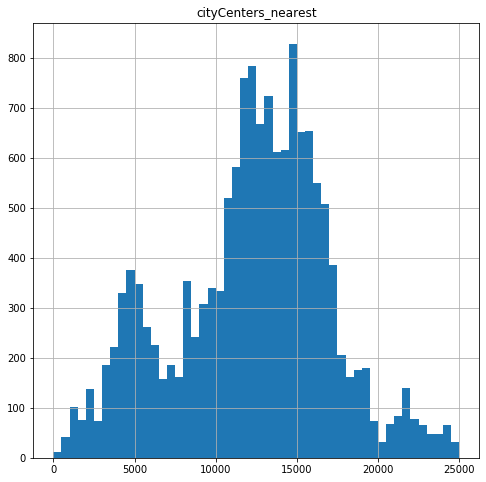

In [147]:

good_place.hist('cityCenters_nearest', figsize=(8, 8), bins=50, range = (0,25000))

In [148]:
good_place.groupby(['cityCenters_nearest'])\
    [['last_price', 'rooms', 'total_area', 'kitchen_area']].agg(['median', 'count']).head(20)

last_price        rooms       total_area        \
                         median count median count     median count   
cityCenters_nearest                                                   
181.0                31099000.0     1    5.0     1      159.0     1   
208.0                 5800000.0     1    1.0     1       33.0     1   
287.0                 9590000.0     1    2.0     1      108.0     1   
318.0                33000000.0     1    2.0     1       75.0     1   
329.0                 7200000.0     1    2.0     1       72.0     1   
387.0                13500000.0     1    3.0     1       96.0     1   
399.0                17100000.0     2    4.0     2      126.5     2   
410.0                 8000000.0     1    3.0     1      106.0     1   
467.0                 9600000.0     2    4.0     2      117.0     2   
472.0                 6900000.0     1    2.0     1       47.0     1   
515.0                 9500000.0     1    2.0     1       81.0     1   
537.0                26000000.0     1    4.0     1      122.0     1   
552.0                 9555000.0     1    3.0     1       65.0     1   
583.0                11500000.0     1    1.0     1       48.0     1   
602.0                24000000.0     1    4.0     1      132.0     1   
621.0                12000000.0     1    2.0     1       70.0     1   
623.0                 8400000.0     1    3.0     1      120.0     1   
650.0                 8500000.0     1    4.0     1       85.0     1   
653.0                15000000.0     1    5.0     1      131.0     1   
658.0                 8500000.0     1    4.0     1      125.0     1   

                    kitchen_area        
                          median count  
cityCenters_nearest                     
181.0                       15.0     1  
208.0                        6.6     1  
287.0                       11.0     1  
318.0                       12.0     1  
329.0                       12.3     1  
387.0                       14.8     1  
399.0                       11.5     2  
410.0                        9.5     1  
467.0                        9.5     2  
472.0                        8.2     1  
515.0                       16.0     1  
537.0                       14.0     1  
552.0                        6.0     1  
583.0                        9.0     1  
602.0                       11.0     1  
621.0                       10.3     1  
623.0                       12.0     1  
650.0                       10.0     1  
653.0                       12.0     1  
658.0                        8.0     1

In [149]:

good_place.query('cityCenters_nearest < 5000')['cityCenters_nearest'].count()



1554

In [150]:
good_place.query('cityCenters_nearest >= 5000 and cityCenters_nearest < 10000')['cityCenters_nearest'].count()


2581

In [151]:
good_place.query('cityCenters_nearest >= 10000 and cityCenters_nearest < 15000')['cityCenters_nearest'].count()


6422

In [152]:
good_place.query('cityCenters_nearest >= 15000 and cityCenters_nearest < 20000')['cityCenters_nearest'].count()


3544

In [153]:
good_place.query('cityCenters_nearest >= 20000')['cityCenters_nearest'].count()

2508

We see that the majority of apartments is at a distance of 10 to 15 km from the centre half is at a distance of 15 to 20 km, about half of apartments in a distance of 5-10km and more than 20, and quite a few are located close to the centre. This is probably due to the smaller number of apartments in the center, compared to the suburbs (due to public places, parks, etc)

In [154]:

def city_center_cat(d):
    if d < 5000:
        return '5 km'
    elif d < 10000 and d >= 5000:
        return '5 - 10 km'
    elif d < 15000 and d >= 10000:
        return '10 - 15 km'
    elif d < 20000 and d >= 15000:
        return '15 - 20 km'
    else:
        return 'more than 20 km'



In [155]:

good_place['cityCenters_nearest_cat'] = good_place['cityCenters_nearest'].apply(city_center_cat)


/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
good_place['cityCenters_nearest_cat'].value_counts()



more than 20 km    7837
10 - 15 km         6422
15 - 20 km         3544
5 - 10 km          2581
5 km               1554
Name: cityCenters_nearest_cat, dtype: int64

In [157]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,m2,week_day_exposition,month_exposition,year_exposition,type_plan,living_area_relation,floor_category,kitchen_total_area_relation,locality_name_type
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,120370,thur,march,2019,another,0.472222,another,0.231481,Saint Peterburg
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,81.0,82920,tue,dec,2018,another,0.460396,first,0.272277,village
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,558.0,92785,thur,aug,2015,another,0.612500,another,0.148214,Saint Peterburg
3,0,64900000,159,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,424.0,408176,fri,july,2015,another,0.188679,another,0.059748,Saint Peterburg
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,100000,tue,june,2018,another,0.320000,another,0.410000,Saint Peterburg


In [158]:
# Let's build a correlation matrix with a correlation higher than 0.5, since only this correlation is significant
corr_price_by_nearest = good_place.groupby('cityCenters_nearest_cat')\
    [['total_area', 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_price_by_nearest[corr_price_by_nearest['last_price'].abs() > 0.5]


,cityCenters_nearest_cat,level_1,last_price
0,10 - 15 km,total_area,0.831392
1,10 - 15 km,rooms,0.503425
3,10 - 15 km,living_area,0.674068
4,10 - 15 km,last_price,1.000000
5,10 - 15 km,kitchen_area,0.561454
9,15 - 20 km,total_area,0.813502
10,15 - 20 km,rooms,0.554341
12,15 - 20 km,living_area,0.638965
13,15 - 20 km,last_price,1.000000
18,5 - 10 km,total_area,0.758866


## What can we say about the price per square meter in the suburbs? Select the 10 localities with the highest number of ads. This data can be distinguished by its name in the 'locality_name' column.  

In [159]:
data['locality_name_type'].unique()

array(['Saint Peterburg', 'village', 'city', 'the location is unknown'],
      dtype=object)

In [160]:
locality_list = ['Saint Peterburg', 'city', 'the location is unknown']
data['suburbs'] = np.where(data['locality_name_type'].isin(locality_list), 0, 1)



In [161]:
data.groupby('suburbs').agg({'m2':'median'})

,m2
suburbs,
0,98744.5
1,70945.0


In the suburbs the price is lower

In [162]:
data_top10 = data.groupby('locality_name')\
    .agg({'suburbs':'count','m2':'median'})\
    .rename(columns={'suburbs':'count_objects','m2':'m2_cost_median'})
data_top10 = data_top10.sort_values('count_objects', ascending=False).head(10)

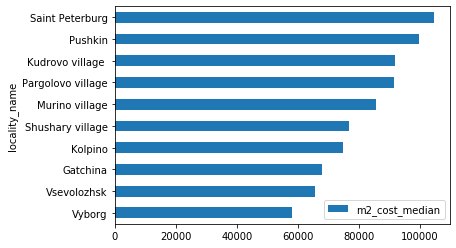

In [163]:
data_top10.sort_values('m2_cost_median', ascending=True)\
    .drop('count_objects', axis=1).plot(kind='barh')

We found the TOP 10 localities where ads appear most often

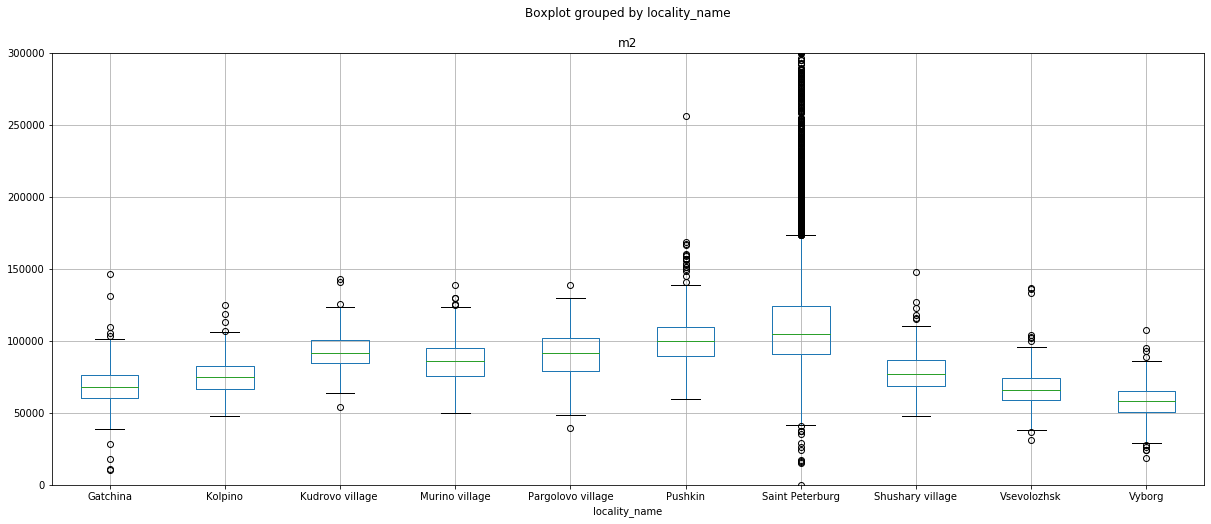

In [164]:
top_10_places = data_top10.reset_index().locality_name.to_list()

plot = data[data.locality_name.isin(top_10_places)]\
    .boxplot('m2', by='locality_name',figsize=(20,8))\
    .set_ylim(0,300000)

You can see that the cost per square meter is higher in Saint Petersburg and Pushkin. It is strange that in the village of Pargolovo (and in all others) the price is higher than in Vyborg, although it is a fairly large city

Let's look at the correlation of all our data.

In [165]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2,year_exposition,living_area_relation,kitchen_total_area_relation,suburbs
total_images,1,0.0986467,0.10961,0.094063,0.0432905,0.0119797,0.101832,0.0314435,-0.0278503,-0.0242403,0.102474,0.123071,-0.00246629,-0.0450668,0.035167,-0.00702818,0.00764873,-0.00447475,-0.0304449,0.127771,0.142123,-0.0238383,-0.0491436,-0.0553845
last_price,0.0986467,1,0.612063,0.347102,0.264384,0.00196813,0.504246,0.0294359,-0.0268827,-0.00859254,0.399376,0.0367368,-0.0259845,-0.210117,0.203466,-0.0106001,0.212071,-0.0834044,0.0733953,0.749064,-0.0395983,-0.0680168,-0.135592,-0.13096
total_area,0.10961,0.612063,1,0.768892,0.380997,-0.0699577,0.868753,-0.024213,-0.0774906,-0.0363818,0.563931,0.0597607,-0.0304632,-0.23346,0.201251,-0.0140883,0.201727,-0.0976517,0.148701,0.278866,-0.0819793,-0.0266875,-0.400528,-0.130691
rooms,0.094063,0.347102,0.768892,1,0.238845,-0.221092,0.826062,-0.148211,-0.0807055,-0.0449677,0.254595,0.0271041,-0.0638464,-0.182021,0.151569,-0.0514344,0.118297,-0.0561448,0.123006,0.0372789,-0.0546772,0.279506,-0.617063,-0.128849
ceiling_height,0.0432905,0.264384,0.380997,0.238845,1,-0.065856,0.350845,-0.0372078,0.00762059,0.000106189,0.337738,-0.0147364,-0.082385,-0.299626,0.251163,-0.0575004,0.222871,-0.125903,0.105335,0.276527,-0.0521158,-0.0416134,-0.0156626,-0.103094
floors_total,0.0119797,0.00196813,-0.0699577,-0.221092,-0.065856,1,-0.162673,0.673193,0.0680532,0.0495298,0.18141,0.193759,0.107374,0.0132835,-0.156245,0.095324,-0.0454847,0.0391164,-0.0497711,0.162695,0.00775781,-0.276564,0.342705,0.0708057
living_area,0.101832,0.504246,0.868753,0.826062,0.350845,-0.162673,1,-0.0961891,-0.0568229,-0.0335641,0.387124,0.0275253,-0.0577759,-0.22324,0.203944,-0.0457992,0.175891,-0.073988,0.140307,0.189486,-0.0750325,0.355882,-0.498676,-0.133675
floor,0.0314435,0.0294359,-0.024213,-0.148211,-0.0372078,0.673193,-0.0961891,1,0.035436,0.034347,0.143709,0.168164,0.0712142,0.00553029,-0.10349,0.0721511,-0.0268841,0.0250009,-0.0377383,0.138153,0.00487346,-0.202961,0.235504,0.0573
studio,-0.0278503,-0.0268827,-0.0774906,-0.0807055,0.00762059,0.0680532,-0.0568229,0.035436,1,-0.0042067,-0.0209102,0.0322371,-0.0214213,-0.00629155,-0.0334088,0.00848118,-0.0108549,0.00266193,-0.0216456,0.017179,0.011646,0.0985124,0.164687,0.0292538
open_plan,-0.0242403,-0.00859254,-0.0363818,-0.0449677,0.000106189,0.0495298,-0.0335641,0.034347,-0.0042067,1,-0.0126308,0.0187767,-0.0137219,-0.0045905,-0.0158826,0.0106314,-0.00338794,-0.00343727,-0.0237305,0.00911294,-0.0211271,0.0536836,0.0913224,0.0352703


We see that the price at the time of removal from publication is closely related to the cost per square meter, kitchen area, living and total area, number of rooms, ceiling height, and even a little with the presence of a Park and pond within a radius of 3 km. There are parameters such as the number of photos in the ad that are not related to anything and do not affect anything. Let's look at the correlation between the main characteristics

In [166]:
corr_with_price_by_rooms = good_place.groupby('rooms')\
    [['total_area', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_rooms[corr_with_price_by_rooms['last_price'].abs() > 0.5]

,rooms,level_1,last_price
0,1,total_area,0.654804
3,1,last_price,1.000000
7,1,m2,0.765660
8,2,total_area,0.699172
11,2,last_price,1.000000
15,2,m2,0.888895
16,3,total_area,0.707688
19,3,last_price,1.000000
23,3,m2,0.897506
24,4,total_area,0.769122


The number of rooms is most correlated with the area, cost per square meter, and price

In [167]:
corr_with_price_by_area = good_place.groupby('total_area')\
    [[ 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_area[corr_with_price_by_area['last_price'].abs() > 0.5].head(20)

,total_area,level_1,last_price
9,13,cityCenters_nearest,-0.685187
10,13,living_area,-0.985429
11,13,last_price,1.000000
13,13,living_area_relation,-0.985767
15,13,m2,0.999939
17,15,cityCenters_nearest,-1.000000
18,15,living_area,-0.922613
19,15,last_price,1.000000
21,15,living_area_relation,-0.922613
22,15,kitchen_total_area_relation,-0.922613


The total area is most correlated with the proximity to the center, the cost per square meter and the area of the kitchen

In [168]:
corr_with_price_by_location = good_place.groupby('locality_name_type')\
    [[ 'rooms', 'cityCenters_nearest', 'living_area', 'last_price', 
      'kitchen_area', 'living_area_relation', 'kitchen_total_area_relation', 'm2']]\
        .corr()['last_price'].reset_index()

corr_with_price_by_location[corr_with_price_by_location['last_price'].abs() > 0.5]

,locality_name_type,level_1,last_price
2,Saint Peterburg,living_area,0.555968
3,Saint Peterburg,last_price,1.000000
7,Saint Peterburg,m2,0.666309
11,city,last_price,1.000000
15,city,m2,0.677590
18,the location is unknown,living_area,0.624198
19,the location is unknown,last_price,1.000000
23,the location is unknown,m2,0.792273
27,village,last_price,1.000000
28,village,kitchen_area,0.527526


The type of location is most correlated with the area, cost per square meter, and price

## Choose the most characteristic parameters for apartments, studios and open-plan apartments. Do they affect the price? Compare with similar parameters of standard layout apartments. <a class="anchor" id="27"></a>

In [169]:
good_houses_by_type = good_place.pivot_table(index='type_plan',
        values=['last_price', 'total_area', 'm2', 'days_exposition', 'kitchen_area', 'ceiling_height', 'rooms', 'floor'], 
                                             aggfunc='median')

good_houses_by_type

,ceiling_height,days_exposition,floor,kitchen_area,last_price,m2,rooms,total_area
type_plan,,,,,,,,
another,2.65,93.0,4.0,9.0,4500000,93457.0,2,50
apartment,3.00,60.0,3.0,9.5,6030000,108858.0,2,56
open plan,2.65,45.0,7.5,9.0,2715000,101111.0,1,27
studio,2.65,54.0,7.0,9.0,2775000,105306.5,1,26


I compared the main median parameters (ceiling height, floor, cost per square meter and total, number of rooms, etc.) in apartments of 4 types of layout.
It became obvious that open-plan apartments and studios are sold for almost the same amount (and it is cheaper than other categories) and faster (45 and 54 days, respectively) The number of floors is higher, the number of rooms is 1, while other types of layout have 2. it is Interesting that the kitchen area does not depend on the type of layout, but the total area of open-plan apartments and studios is almost half that of other apartments. The ceilings are higher only in the apartments, and in the other apartments they are identical. The cost of a square meter does not differ in principle and is only slightly lower in standard apartments and slightly higher in apartments.

# Project SUMMARY <a class= "anchor" id= "28"></a>

### The project was difficult, but interesting))) . Now, having reached the end, I began to understand better how to optimize the work time in the next project, and it became clear to me that some of the work could not be done. 
### While working on the project, all data was reviewed and processed, omissions were filled in, and anomalies were eliminated. I used both deleting columns and replacing them with the median value, building histograms, and correlation tables. I categorise some of the characteristics (type of settlement, distance to the centre of the floor). We calculated and added to the table: the price per square meter; the day of the week, month and year of publication of the ad; the floor where the apartment is located (first, last, other), the ratio of residential and total area, as well as the ratio of kitchen area to total.

### We calculated the parameters of a typical apartment and analyzed whether the price per square meter depends on the number of rooms, floor (first or last), distance from the center and the date of placement: day of the week, month and year. My analysis showed that the further from the center the apartment is located, the lower the price per square meter, that in St. Petersburg apartments are more expensive than in the region and that in the period from 2016 to 2019, the price per square meter increased.

### Determined the top 10 localities by the number of ads (Peter, Vyborg, Kudrovo village, Pargonovo village, Murino village, Peergof, Gatchina, Kolpino, etc.) and found that in St. Petersburg the most expensive apartments (per square meter), and the cheapest in Vyborg. I analyzed open-plan apartments, apartments and studios and found out their typical characteristics. It became clear that studios and open-plan apartments are very similar in terms of parameters, but apartments are more expensive, have a larger area and cost.

### The main factors that affect the price are the total area, distance from the center and location, number of rooms. Other characteristics do not have such a strong impact.